# Import dependencies

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

# Functions

In [2]:
def plot_region(df, regione):
    df_regione = df[df["denominazione_regione"] == regione]
    province = list(df_regione["denominazione_provincia"].unique())
    
    plt.rcParams.update({"legend.fontsize": "x-large",
                         "figure.figsize": (20, 15),
                         'xtick.labelsize': 10})
    ax = plt.gca()
    formatter = mdates.DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(formatter)
    locator = mdates.DayLocator()
    ax.xaxis.set_major_locator(locator)

    for i in range(len(province)):
        df_provincia = df_regione[df_regione["denominazione_provincia"] == province[i]]
        
        data = df_provincia["data"].values
        totale_casi = df_provincia["totale_casi"].values
        plt.plot(data, totale_casi, label=province[i])
    
    totale_casi = (df[df["denominazione_regione"] == regione]
                   .groupby(["data"])["totale_casi"]
                   .sum().values)
    plt.plot(data, totale_casi, label="Totale %s" % regione)
    
    plt.legend(loc="upper left")
    plt.show()    

# Load data

In [3]:
dati_province_fpath = "../../dati-province/dpc-covid19-ita-province.csv"
df = pd.read_csv(dati_province_fpath, sep=",")

In [4]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


## Coverti data: string to datetime object

In [5]:
df.loc[:, "data"] = df.loc[:, "data"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [6]:
df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


# Totale per regione

In [7]:
df_totale_regione = (df[ df["data"] == df["data"].max() ]
                     .groupby(["denominazione_regione"], as_index=False)["totale_casi"].sum()
                     .sort_values(["totale_casi"], ascending=[False])) 

In [8]:
df_totale_regione

,denominazione_regione,totale_casi
8,Lombardia,17713
4,Emilia Romagna,4525
20,Veneto,3214
13,Piemonte,2341
9,Marche,1568
17,Toscana,1330
7,Liguria,887
6,Lazio,724
5,Friuli Venezia Giulia,462
3,Campania,460


In [9]:
df_totale_regione["totale_casi"].sum()

35713

# Andamento Lombardia

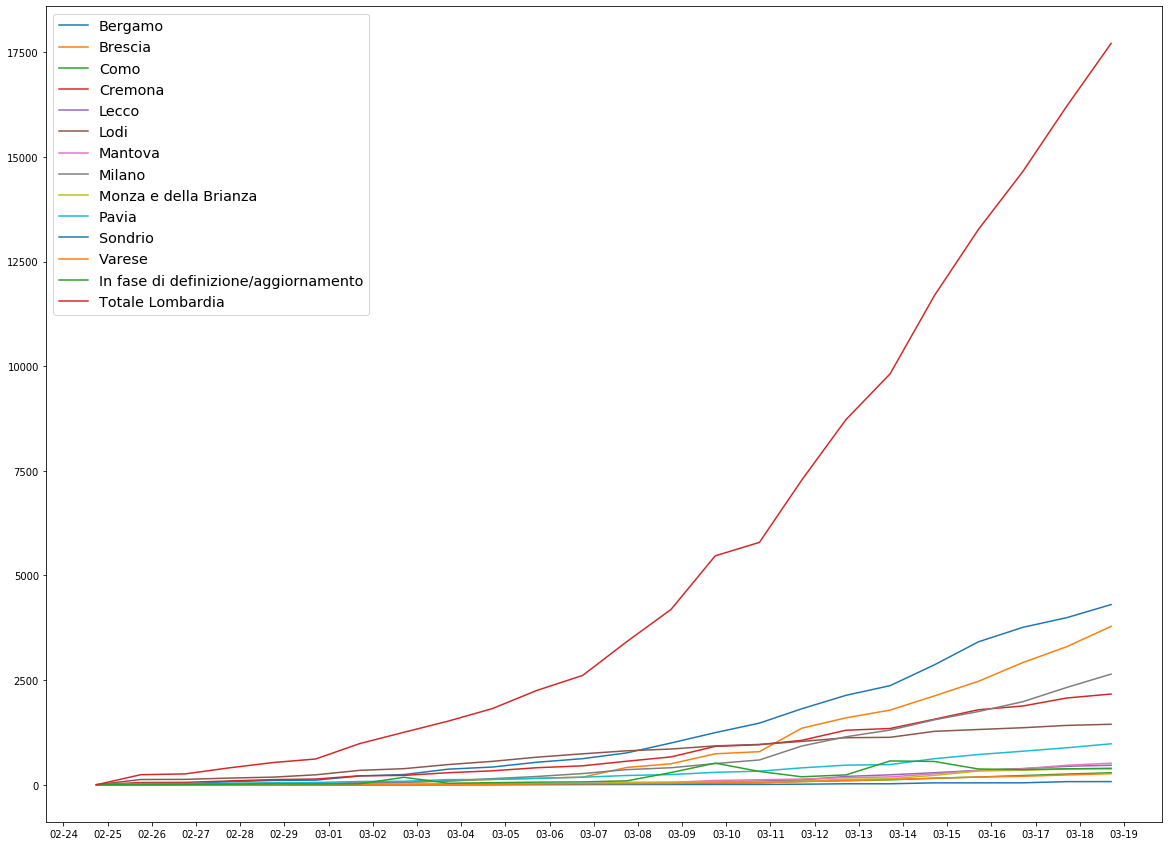

In [10]:
plot_region(df, "Lombardia")

# Andamento Emilia Romagna

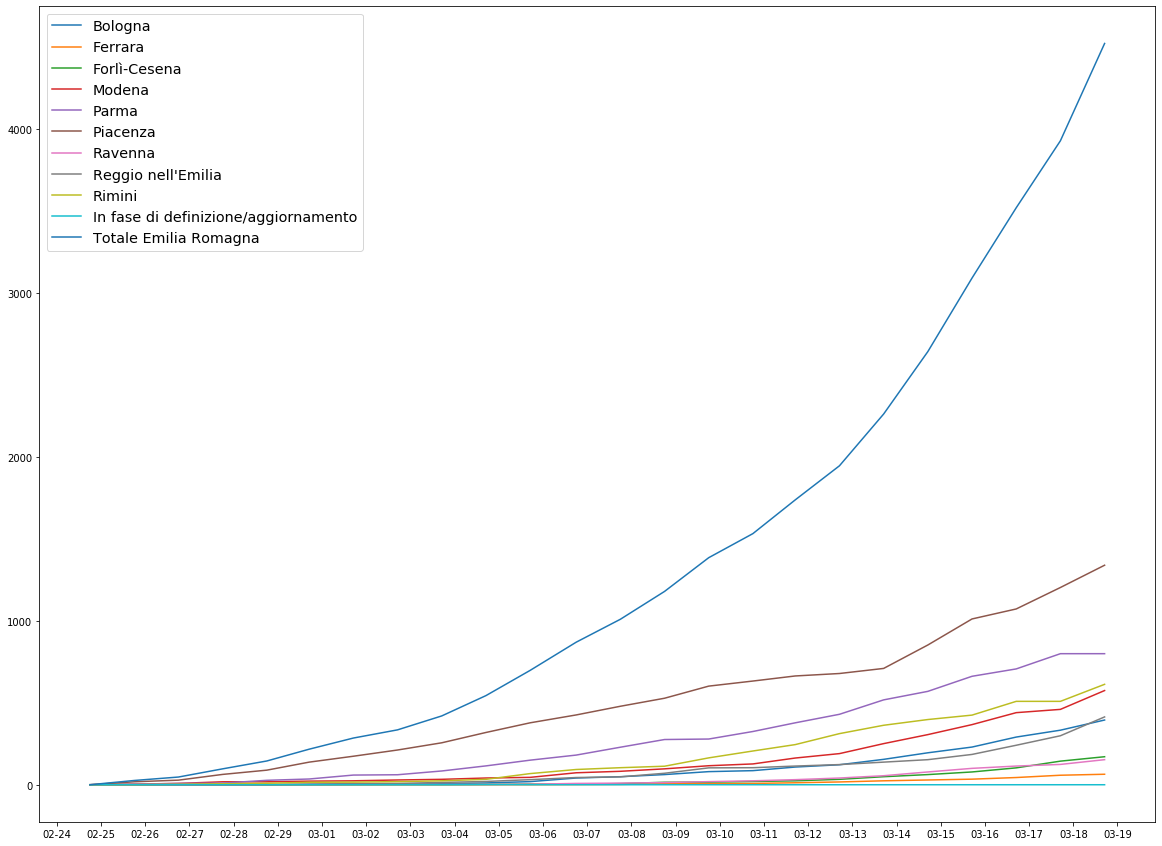

In [11]:
plot_region(df, "Emilia Romagna")

# Andamento Veneto

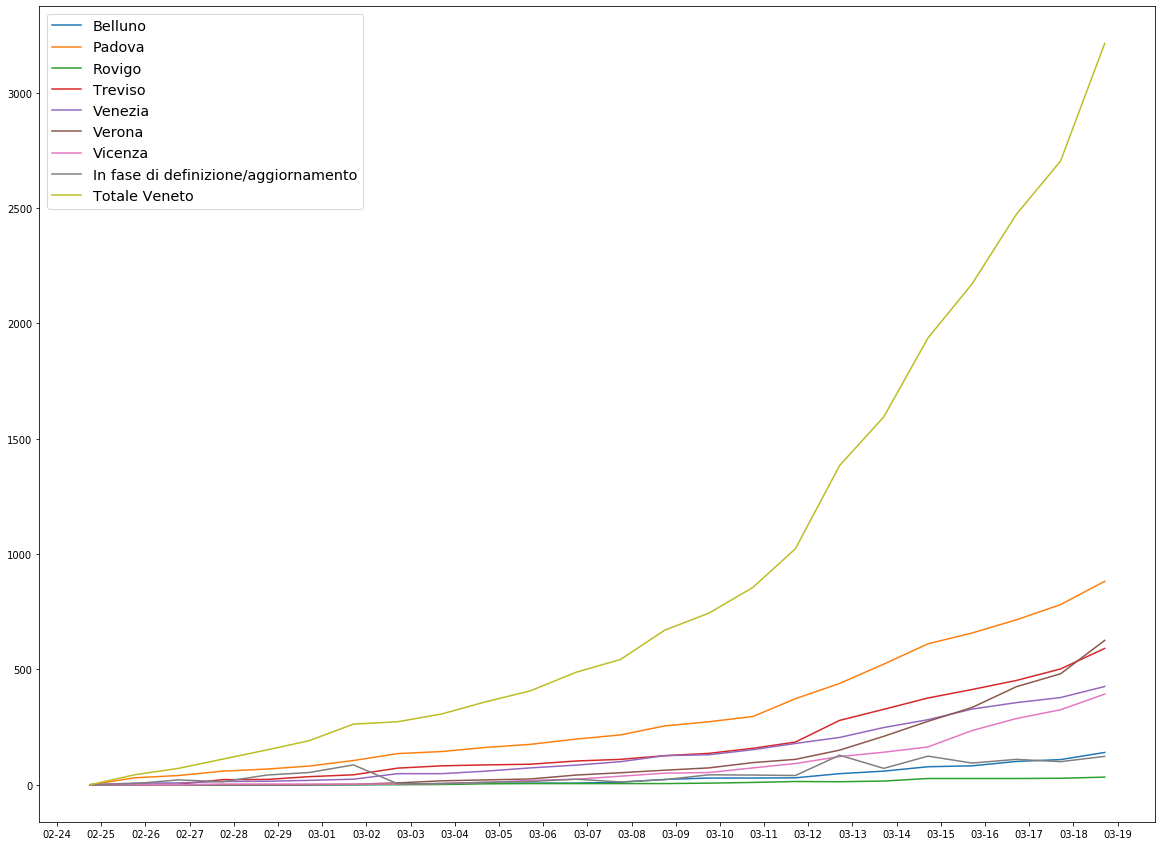

In [12]:
plot_region(df, "Veneto")

# Andamento Sardegna

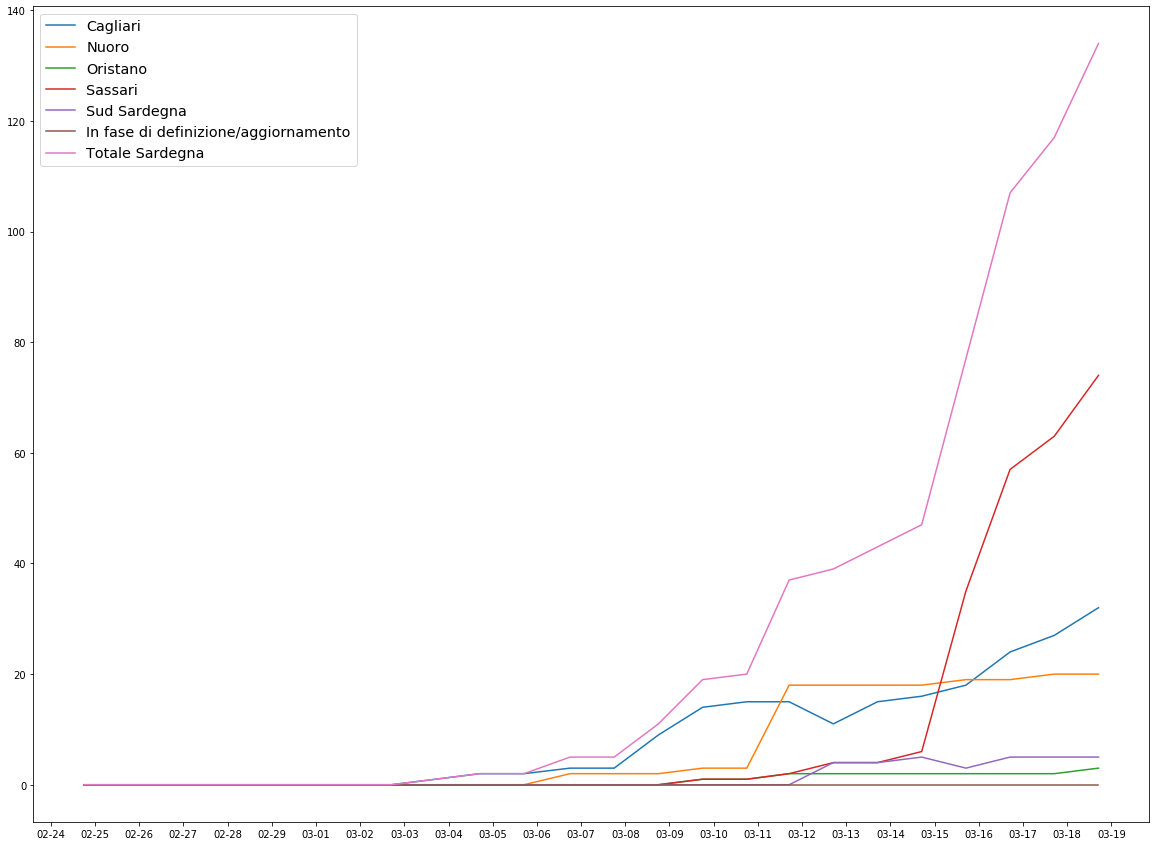

In [13]:
plot_region(df, "Sardegna")